In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

## Support Vector Machine Libraries
from sklearn import svm

## Decision Tree Libraries
from sklearn import tree

## Adaboost Libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

## Cross Validation Libraries 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

## Library for plotting
import matplotlib.pyplot as plt

## Performance metrics libraries
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier


In [4]:
adult = pd.read_csv(r'D:\Masters\Universities\UTD\Academic\Spring 2020\BUAN 6341\Assignments\Assignment 2\adult.data',
                 names = ['age','workclass', 'fnlwgt', 'education' , 'education-num', 'marital-status', 'occupation',
                          'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
                          'income'])
adult


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
(adult['income'].value_counts())

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

In [8]:
adult.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
# Null values need to be checked as the algorithm deals with only numerical values.
adult.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [10]:
""""
for i in adult['income']:
    if i == '<=50K':
        adult['income'] = 0
    else:
        adult['income'] = 1            

adult['income'] = adult['income'].replace(' <=50K', 0)
adult['income'] = adult['income'].replace(' >50K', 1)
"""
one = adult['income'][0]
two = adult['income'][32560]
adult['income'][adult['income'] == one] = 0
adult['income'][adult['income'] == two] = 1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
adult['income']

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income, Length: 32561, dtype: object

In [12]:
# Converting categorical variables to dummy variables
adult['education'].head()

0     Bachelors
1     Bachelors
2       HS-grad
3          11th
4     Bachelors
Name: education, dtype: object

In [13]:
pd.get_dummies(adult['education']).head()

,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [14]:
# In order to decide which categorical variables need to be used in the model, the number of distinct categories need to be
# ascertained.
for colname in adult.columns:
    if adult[colname].dtypes== 'object' :
        unique_no = len(adult[colname].unique())
        print('{} has {} distinct categories.'.format(colname,unique_no))

workclass has 9 distinct categories.
education has 16 distinct categories.
marital-status has 7 distinct categories.
occupation has 15 distinct categories.
relationship has 6 distinct categories.
race has 5 distinct categories.
sex has 2 distinct categories.
native-country has 42 distinct categories.
income has 2 distinct categories.


In [15]:
# native-country has the most number of categories
adult['native-country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [16]:
# Since United States has the largest number of observations, this feature can be modified to have two categories
# 'United-States' and 'Others'

one = adult['native-country'][0]
two = adult['native-country'][4]
adult['native-country'][adult['native-country'] == one] = 'United-States'
adult['native-country'][adult['native-country'] == two] = 'Other'                   

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [17]:
adult['native-country']

0        United-States
1        United-States
2        United-States
3        United-States
4                Other
             ...      
32556    United-States
32557    United-States
32558    United-States
32559    United-States
32560    United-States
Name: native-country, Length: 32561, dtype: object

In [0]:
dummy_list = ['workclass','education', 'marital-status', 'occupation', 'relationship', 'race','sex','native-country' ]

In [0]:
# A function is defined to create dummies for the categorical variables mentioned in the list
def dummy_dframe(df, dummy_list):
    for x in dummy_list:
        dummies = pd.get_dummies(df[x], prefix = x, dummy_na = False)
        df = df.drop(x,1)
        df = pd.concat([df, dummies], axis = 1)
    return df

In [20]:
adult = dummy_dframe(adult, dummy_list)
adult.head(5)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ ?,...,native-country_ Canada,native-country_ China,native-country_ Columbia,native-country_ Dominican-Republic,native-country_ Ecuador,native-country_ El-Salvador,native-country_ England,native-country_ France,native-country_ Germany,native-country_ Greece,native-country_ Guatemala,native-country_ Haiti,native-country_ Holand-Netherlands,native-country_ Honduras,native-country_ Hong,native-country_ Hungary,native-country_ India,native-country_ Iran,native-country_ Ireland,native-country_ Italy,native-country_ Jamaica,native-country_ Japan,native-country_ Laos,native-country_ Mexico,native-country_ Nicaragua,native-country_ Outlying-US(Guam-USVI-etc),native-country_ Peru,native-country_ Philippines,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ Vietnam,native-country_ Yugoslavia,native-country_Other,native-country_United-States
0,39,77516,13,2174,0,40,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,50,83311,13,0,0,13,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,38,215646,9,0,0,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,53,234721,7,0,0,40,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,28,338409,13,0,0,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [0]:
from sklearn.model_selection import train_test_split

In [ ]:
adult = adult.sample(5000)

In [0]:
X = adult.drop('income', axis =1)

In [0]:
Y = adult['income']
Y = Y.astype('int')

In [0]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.3, random_state=42)

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [0]:
#Scaling the independent features
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [0]:
def validation(clf,X_train, Y_train):
    scores = cross_validate(clf, X_train, Y_train,cv=10, return_train_score=True)
    return scores

In [29]:
Y_train

21376    0
2152     0
29812    0
30233    0
20884    1
        ..
7757     1
11857    1
21876    1
9801     1
13056    1
Name: income, Length: 3500, dtype: int64

In [0]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

PERFORMANCE OF LINEAR KERNEL

In [0]:
model_linear = SVC(kernel='linear', C=0.1)
score_1_linear = validation(model_linear, X_train, Y_train)
model_linear = SVC(kernel='linear', C=0.5)
score_2_linear = validation(model_linear, X_train, Y_train)
model_linear = SVC(kernel='linear', C=1)
score_3_linear = validation(model_linear, X_train, Y_train)
model_linear = SVC(kernel='linear', C=5)
score_4_linear = validation(model_linear, X_train, Y_train)
model_linear = SVC(kernel='linear', C=10)
score_5_linear = validation(model_linear, X_train, Y_train)
model_linear = SVC(kernel='linear', C=50)
score_6_linear = validation(model_linear, X_train, Y_train)

In [0]:
score_1_linear=pd.DataFrame.from_dict(score_1_linear)
score_2_linear=pd.DataFrame.from_dict(score_2_linear)
score_3_linear=pd.DataFrame.from_dict(score_3_linear)
score_4_linear=pd.DataFrame.from_dict(score_4_linear)
score_5_linear=pd.DataFrame.from_dict(score_5_linear)
score_6_linear=pd.DataFrame.from_dict(score_6_linear)

In [64]:
score_1_linear

,fit_time,score_time,test_score,train_score
0,0.659924,0.052802,0.845714,0.861587
1,0.652705,0.052382,0.845714,0.865397
2,0.675189,0.052408,0.868571,0.864127
3,0.656018,0.052081,0.851429,0.859683
4,0.668751,0.052371,0.840000,0.863175
5,0.676983,0.052675,0.860000,0.864444
6,0.669475,0.051246,0.817143,0.866349
7,0.673208,0.052404,0.854286,0.864127
8,0.652915,0.050989,0.822857,0.864444
9,0.658475,0.052224,0.871429,0.859048


In [0]:
   s1_linear_train=[score_1_linear[['train_score']].mean(axis=0),
                score_2_linear[['train_score']].mean(axis=0),score_3_linear[['train_score']].mean(axis=0),
                score_4_linear[['train_score']].mean(axis=0),score_5_linear[['train_score']].mean(axis=0),score_6_linear[['train_score']].mean(axis=0)]  

s1_linear_test=[score_1_linear[['test_score']].mean(axis=0),
                score_2_linear[['test_score']].mean(axis=0),score_3_linear[['test_score']].mean(axis=0),
                score_4_linear[['test_score']].mean(axis=0),score_5_linear[['test_score']].mean(axis=0),score_6_linear[['test_score']].mean(axis=0)]   

In [0]:
## Learning curve for Train and Test accuracy for Linear SVM function for various values of C
def train_cv_plot(c,s1_linear_train,s1_linear_test):
    plt.plot(c,s1_linear_train,label='train')
    plt.plot(c,s1_linear_test,label='cv')
    plt.xlabel("C(Regularization Parameter)")
    plt.ylabel("Accuracy")
    plt.legend(loc='lower right')
    plt.title("Train and CrossValidation accuracy for SVM  as a function of C for Adults dataset")

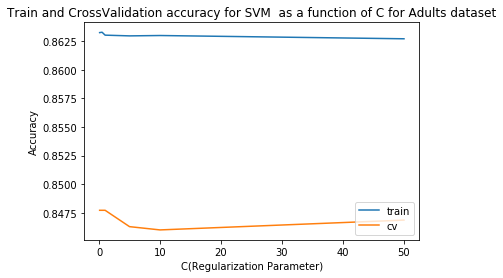

In [66]:
c=[0.1,0.5,1,5,10,50]
train_cv_plot(c,s1_linear_train,s1_linear_test)

PERFORMANCE OF RBF KERNEL

In [0]:
model_linear = SVC(kernel='rbf', C=0.01)
score_1_rbf = validation(model_linear, X_train, Y_train)
model_linear = SVC(kernel='rbf', C=0.1)
score_2_rbf = validation(model_linear, X_train, Y_train)
model_linear = SVC(kernel='rbf', C=0.5)
score_3_rbf = validation(model_linear, X_train, Y_train)
model_linear = SVC(kernel='rbf', C=1)
score_4_rbf = validation(model_linear, X_train, Y_train)
model_linear = SVC(kernel='rbf', C=5)
score_5_rbf = validation(model_linear, X_train, Y_train)
model_linear = SVC(kernel='rbf', C=50)
score_6_rbf = validation(model_linear, X_train, Y_train)

In [0]:
score_1_rbf=pd.DataFrame.from_dict(score_1_rbf)
score_2_rbf=pd.DataFrame.from_dict(score_2_rbf)
score_3_rbf=pd.DataFrame.from_dict(score_3_rbf)
score_4_rbf=pd.DataFrame.from_dict(score_4_rbf)
score_5_rbf=pd.DataFrame.from_dict(score_5_rbf)
score_6_rbf=pd.DataFrame.from_dict(score_6_rbf)

In [50]:
score_2_rbf

,fit_time,score_time,test_score,train_score
0,1.010728,0.100377,0.831429,0.824762
1,1.015121,0.100290,0.805714,0.827302
2,1.012427,0.102520,0.842857,0.820000
3,0.988635,0.099723,0.817143,0.822222
4,1.005596,0.100746,0.805714,0.826667
5,1.002794,0.100382,0.825714,0.822857
6,1.015961,0.099541,0.800000,0.829841
7,1.005537,0.100211,0.837143,0.820635
8,0.998021,0.099808,0.802857,0.828254
9,0.989951,0.100033,0.820000,0.824762


In [0]:
s1_rbf_train=[score_1_rbf[['train_score']].mean(axis=0),score_2_rbf[['train_score']].mean(axis=0),
                score_3_rbf[['train_score']].mean(axis=0),score_4_rbf[['train_score']].mean(axis=0),
                score_5_rbf[['train_score']].mean(axis=0),score_6_rbf[['train_score']].mean(axis=0)]  

s1_rbf_test=[score_1_rbf[['test_score']].mean(axis=0),score_2_rbf[['test_score']].mean(axis=0),
                score_3_rbf[['test_score']].mean(axis=0),score_4_rbf[['test_score']].mean(axis=0),
                score_5_rbf[['test_score']].mean(axis=0),score_6_rbf[['test_score']].mean(axis=0)]  

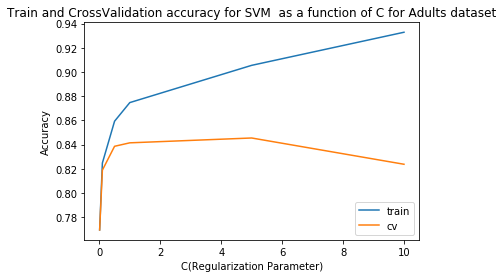

In [70]:
c=[0.01,0.1,0.5,1,5,10]
train_cv_plot(c,s1_rbf_train,s1_rbf_test)

PERFORMANCE OF SIGMOID KERNEL

In [0]:
model_linear = SVC(kernel='sigmoid', C=0.5)
score_1_sig = validation(model_linear, X_train, Y_train)
model_linear = SVC(kernel='sigmoid', C=1)
score_2_sig = validation(model_linear, X_train, Y_train)
model_linear = SVC(kernel='sigmoid', C=5)
score_3_sig = validation(model_linear, X_train, Y_train)
model_linear = SVC(kernel='sigmoid', C=10)
score_4_sig = validation(model_linear, X_train, Y_train)
model_linear = SVC(kernel='sigmoid', C=50)
score_5_sig = validation(model_linear, X_train, Y_train)

In [0]:
score_1_sig=pd.DataFrame.from_dict(score_1_sig)
score_2_sig=pd.DataFrame.from_dict(score_2_sig)
score_3_sig=pd.DataFrame.from_dict(score_3_sig)
score_4_sig=pd.DataFrame.from_dict(score_4_sig)
score_5_sig=pd.DataFrame.from_dict(score_5_sig)

In [74]:
score_1_sig

,fit_time,score_time,test_score,train_score
0,0.855366,0.079509,0.834286,0.847302
1,0.849624,0.080492,0.845714,0.845079
2,0.846231,0.081211,0.848571,0.848889
3,0.830997,0.079777,0.848571,0.843810
4,0.840039,0.080350,0.848571,0.844762
5,0.830375,0.080280,0.865714,0.842857
6,0.812158,0.077814,0.800000,0.849841
7,0.836821,0.080441,0.848571,0.847937
8,0.824216,0.078878,0.820000,0.845714
9,0.841365,0.079981,0.857143,0.842222


In [0]:
s1_sig_train=[
                score_1_sig[['train_score']].mean(axis=0),score_2_sig[['train_score']].mean(axis=0),
                score_3_sig[['train_score']].mean(axis=0),score_4_sig[['train_score']].mean(axis=0),score_5_sig[['train_score']].mean(axis=0)]  

s1_sig_test=[
                score_1_sig[['test_score']].mean(axis=0),score_2_sig[['test_score']].mean(axis=0),
                score_3_sig[['test_score']].mean(axis=0),score_4_sig[['test_score']].mean(axis=0),score_5_sig[['test_score']].mean(axis=0)]  

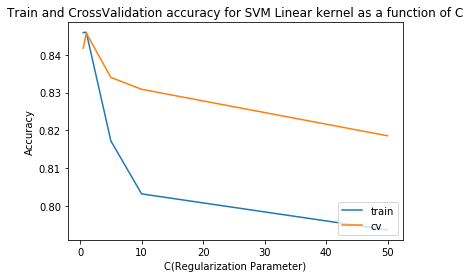

In [56]:
c=[0.5,1,5,10,50]
train_cv_plot(c,s1_sig_train,s1_sig_test)

PERFORMANCE COMPARISONS

In [57]:
clf_linear_1 = svm.SVC(kernel='linear', C=1)
clf_linear_1.fit(X_train,Y_train)

clf_rbf_1 = svm.SVC(kernel='rbf', C=1)
clf_rbf_1.fit(X_train,Y_train)

clf_sigmoid_1 = svm.SVC(kernel='sigmoid', C=0.5)
clf_sigmoid_1.fit(X_train,Y_train)

SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
y_pred_linear=clf_linear_1.predict(X_test)
y_pred_rbf=clf_rbf_1.predict(X_test)
y_pred_sigmoid=clf_sigmoid_1.predict(X_test)

In [59]:
## Classification report for SVM-Linear
print(confusion_matrix(Y_test,y_pred_linear))  
print(classification_report(Y_test,y_pred_linear))
print(accuracy_score(Y_test,y_pred_linear))

[[1058   73]
 [ 159  210]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      1131
           1       0.74      0.57      0.64       369

    accuracy                           0.85      1500
   macro avg       0.81      0.75      0.77      1500
weighted avg       0.84      0.85      0.84      1500

0.8453333333333334


In [60]:
## Classification report for SVM-rbf
print(confusion_matrix(Y_test,y_pred_rbf))  
print(classification_report(Y_test,y_pred_rbf))
print(accuracy_score(Y_test,y_pred_rbf))

[[1059   72]
 [ 179  190]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.89      1131
           1       0.73      0.51      0.60       369

    accuracy                           0.83      1500
   macro avg       0.79      0.73      0.75      1500
weighted avg       0.82      0.83      0.82      1500

0.8326666666666667


In [61]:
## Classification report for SVM-sigmoid
print(confusion_matrix(Y_test,y_pred_sigmoid))  
print(classification_report(Y_test,y_pred_sigmoid))
print(accuracy_score(Y_test,y_pred_sigmoid))

[[1066   65]
 [ 173  196]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1131
           1       0.75      0.53      0.62       369

    accuracy                           0.84      1500
   macro avg       0.81      0.74      0.76      1500
weighted avg       0.83      0.84      0.83      1500

0.8413333333333334


# DECISION TREES

In [0]:
def train_using_gini(X_train, Y_train, depth): 
  
    clf_gini = DecisionTreeClassifier(criterion = "gini", 
            random_state = 42,max_depth=depth) 
  
    clf_gini.fit(X_train, Y_train) #training
    return clf_gini 

In [0]:
def prediction(X_test, clf_object): 
  
    y_pred_tree = clf_object.predict(X_test)  
    return y_pred_tree

In [0]:
def accuracy(y_test, y_pred): 
      
    print("Confusion Matrix is: ",confusion_matrix(Y_test, y_pred)) 
      
    print ("Accuracy Score is: ", accuracy_score(Y_test,y_pred)*100) 
      
    print(classification_report(Y_test, y_pred))

In [84]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100)
clf_gini.fit(X_train, Y_train) 
y_pred_tree = prediction(X_test, clf_gini)
accuracy(Y_test, y_pred_tree)

Confusion Matrix is:  [[973 158]
 [151 218]]
Accuracy Score is:  79.4
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      1131
           1       0.58      0.59      0.59       369

    accuracy                           0.79      1500
   macro avg       0.72      0.73      0.72      1500
weighted avg       0.80      0.79      0.79      1500



In [85]:
print(clf_gini.tree_.max_depth)

32


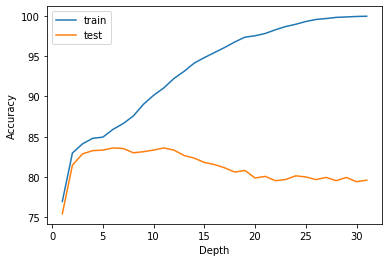

In [90]:
test_accuracy = []
train_accuracy = []
depth = []
for i in range(1,clf_gini.tree_.max_depth):
    clf_gini_1 = train_using_gini(X_train, Y_train, i)
    y_pred_tree_test = prediction(X_test, clf_gini_1)
    y_pred_tree_train = prediction(X_train, clf_gini_1)
    test_accuracy.append(accuracy_score(Y_test,y_pred_tree_test)*100)
    train_accuracy.append(accuracy_score(Y_train,y_pred_tree_train)*100)
    depth.append(i)
    
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.plot(depth,train_accuracy, label='train')
plt.plot(depth,test_accuracy, label='test')
plt.legend(loc='best')
plt.show()

# BOOSTING

In [0]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

In [93]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, Y_train)
AdaBoostClassifier(n_estimators=100, random_state=0)

clf.predict(X_test)

clf.score(X_test, Y_test)

0.8573333333333333

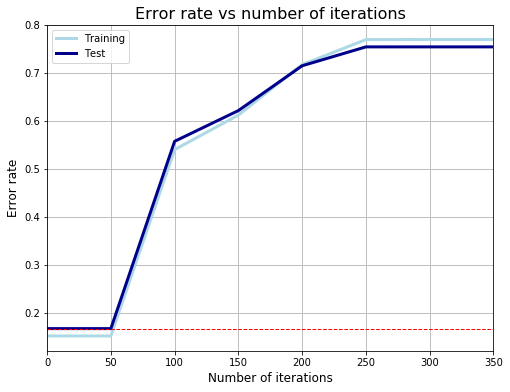

In [96]:
""" HELPER FUNCTION: GET ERROR RATE ========================================="""
def get_error_rate(pred, Y):
    return sum(pred != Y) / float(len(Y))

""" HELPER FUNCTION: PRINT ERROR RATE ======================================="""
def print_error_rate(err):
    print ('Error rate: Training: %.4f - Test: %.4f', err)

""" HELPER FUNCTION: GENERIC CLASSIFIER ====================================="""
def generic_clf(Y_train, X_train, Y_test, X_test, clf):
    clf.fit(X_train,Y_train)
    pred_train = clf.predict(X_train)
    pred_test = clf.predict(X_test)
    return get_error_rate(pred_train, Y_train), \
           get_error_rate(pred_test, Y_test)
    
""" ADABOOST IMPLEMENTATION ================================================="""
def adaboost_clf(Y_train, X_train, Y_test, X_test, M, clf):
    n_train, n_test = len(X_train), len(X_test)
    # Initialize weights
    w = np.ones(n_train) / n_train
    pred_train, pred_test = [np.zeros(n_train), np.zeros(n_test)]
    
    for i in range(M):
        # Fit a classifier with the specific weights
        clf.fit(X_train, Y_train, sample_weight = w)
        pred_train_i = clf.predict(X_train)
        pred_test_i = clf.predict(X_test)
        # Indicator function
        miss = [int(x) for x in (pred_train_i != Y_train)]
        # Equivalent with 1/-1 to update weights
        miss2 = [x if x==1 else -1 for x in miss]
        # Error
        err_m = np.dot(w,miss) / sum(w)
        # Alpha
        alpha_m = 0.5 * np.log( (1 - err_m) / float(err_m))
        # New weights
        w = np.multiply(w, np.exp([float(x) * alpha_m for x in miss2]))
        # Add to prediction
        pred_train = [sum(x) for x in zip(pred_train, 
                                          [x * alpha_m for x in pred_train_i])]
        pred_test = [sum(x) for x in zip(pred_test, 
                                         [x * alpha_m for x in pred_test_i])]
    
    pred_train, pred_test = np.sign(pred_train), np.sign(pred_test)
    # Return error rate in train and test set
    return get_error_rate(pred_train, Y_train), \
           get_error_rate(pred_test, Y_test)

""" PLOT FUNCTION ==========================================================="""
def plot_error_rate(er_train, er_test):
    df_error = pd.DataFrame([er_train, er_test]).T
    df_error.columns = ['Training', 'Test']
    plot1 = df_error.plot(linewidth = 3, figsize = (8,6),
            color = ['lightblue', 'darkblue'], grid = True)
    plot1.set_xlabel('Number of iterations', fontsize = 12)
    plot1.set_xticklabels(range(0,450,50))
    plot1.set_ylabel('Error rate', fontsize = 12)
    plot1.set_title('Error rate vs number of iterations', fontsize = 16)
    plt.axhline(y=er_test[0], linewidth=1, color = 'red', ls = 'dashed')

""" MAIN SCRIPT ============================================================="""
if __name__ == '__main__':
    
    
    
    # Fit a simple decision tree first
    clf_tree = DecisionTreeClassifier(max_depth = 4, random_state = 1)
    er_tree = generic_clf(Y_train, X_train, Y_test, X_test, clf_tree)
    
    # Fit Adaboost classifier using a decision tree as base estimator
    # Test with different number of iterations
    er_train, er_test = [er_tree[0]], [er_tree[1]]
    x_range = range(10, 50, 10)
    for i in [1,5,10,20,40,80,200]:    
        er_i = adaboost_clf(Y_train, X_train, Y_test, X_test, i, clf_tree)
        er_train.append(er_i[0])
        er_test.append(er_i[1])
    
    # Compare error rate vs number of iterations
    plot_error_rate(er_train, er_test)

In [0]:
regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300)

regr_1.fit(X_train, Y_train)
regr_2.fit(X_train, Y_train)

# Predict
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

In [100]:
regr_2.fit(X_train,Y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=4,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=None,
                                                       splitter='best'),
                  

In [0]:
ErrorRate_train=[]
ErrorRate_test=[]
x_range=range(10,150,5)
for i in x_range:
    regr_2 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),
                          n_estimators=i, random_state=23)
    regr_2.fit(X_train,Y_train)
    pred_train=regr_2.predict(X_train)
    pred_test=regr_2.predict(X_test)
    error_rate_train=sum(pred_train != Y_train) / float(len(Y_train))
    error_rate_test=sum(pred_test != Y_test) / float(len(Y_test))
    ErrorRate_train.append(error_rate_train)
    ErrorRate_test.append(error_rate_test)

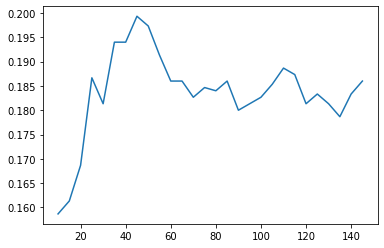

In [102]:
# Plotting train and test error rates
plt.plot(x_range,ErrorRate_test)